<a href="https://colab.research.google.com/github/Balajivasudevan03/Linear_regression_model/blob/main/Linear_Regression_jamboree_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
A = pd.read_csv("/content/Jamboree_Admission.csv")

df = A.copy() #deep copying

In [3]:
df.shape

(500, 9)

In [4]:
df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
415,416,327,106,4,4.0,4.5,8.75,1,0.76
9,10,323,108,3,3.5,3.0,8.60,0,0.45
403,404,330,116,4,4.0,3.5,9.23,1,0.91
30,31,300,97,2,3.0,3.0,8.10,1,0.65
47,48,339,119,5,4.5,4.0,9.70,0,0.89
282,283,312,106,3,4.0,3.5,8.79,1,0.81
23,24,334,119,5,5.0,4.5,9.70,1,0.95
318,319,324,111,3,2.5,2.0,8.80,1,0.79
431,432,320,112,2,3.5,3.5,8.78,1,0.73
19,20,303,102,3,3.5,3.0,8.50,0,0.62


In [5]:
# Checking for duplicates
df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [6]:
# Missing values
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [7]:
df[df.isnull().any(axis=1)] # checking for any missing values

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [8]:
df[df.isnull().all(axis=1)] # checking for any missing values

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [9]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
df.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [12]:
# obtain the first quartile
Q1 = df.quantile(0.25)

# obtain the third quartile
Q3 = df.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

Serial No.           249.5000
GRE Score             17.0000
TOEFL Score            9.0000
University Rating      2.0000
SOP                    1.5000
LOR                    1.0000
CGPA                   0.9125
Research               1.0000
Chance of Admit        0.1900
dtype: float64


In [13]:
### removing the outliers
df_iqr=df[~((df < (Q1-1.5*IQR))|(df > (Q3 + 1.5*IQR))).any(axis=1)]

In [14]:
df_iqr.shape

(497, 9)

In [15]:
df_2 = df_iqr.copy() # deep copying the new df out of old df

In [16]:
df_2

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [17]:
# dropping the irrelavant column
df_2.drop(columns="Serial No.",inplace=True)

In [18]:
df_2.shape

(497, 8)

# graphical analysis!!!

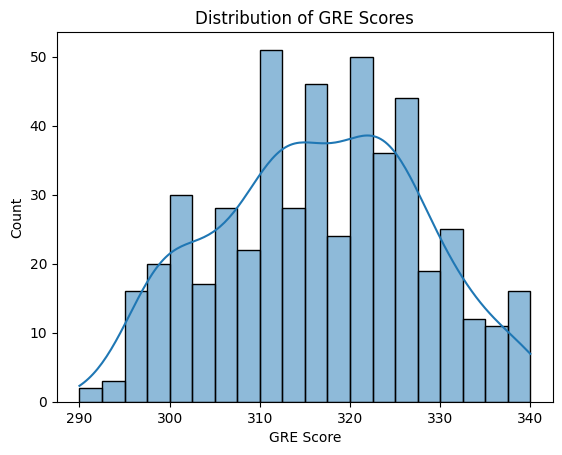

In [19]:
# Histogram for GRE Score
sns.histplot(df['GRE Score'], bins=20, kde=True)
plt.title('Distribution of GRE Scores')
plt.show()


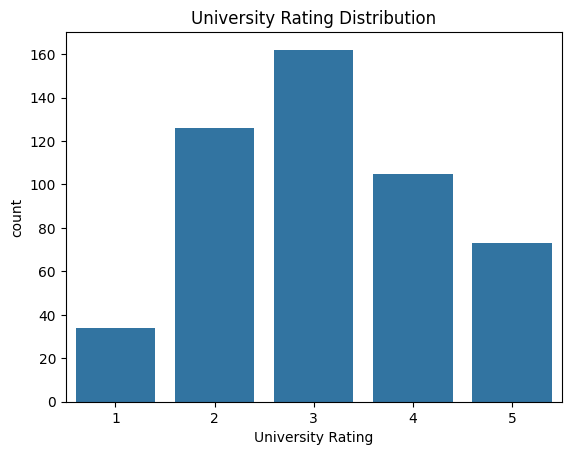

In [20]:
# Bar plot for University Rating
sns.countplot(x=df['University Rating'])
plt.title('University Rating Distribution')
plt.show()


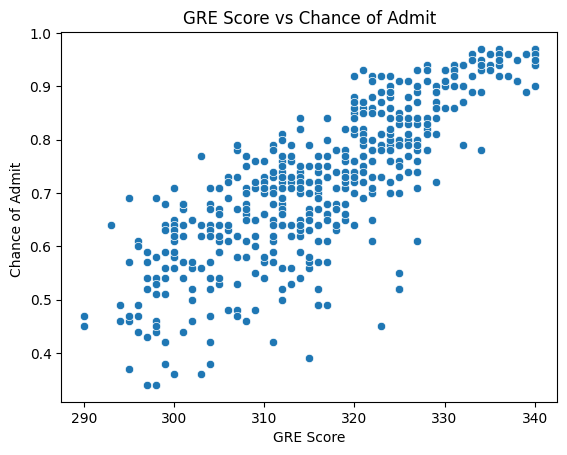

In [21]:
# Scatter plot with regression line
sns.scatterplot(x=df['GRE Score'], y=df['Chance of Admit '])
plt.title('GRE Score vs Chance of Admit')
plt.show()


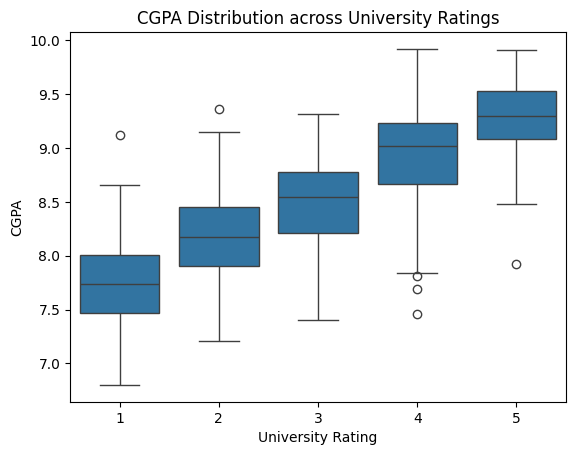

In [22]:
# Box plot for University Rating vs CGPA
sns.boxplot(x=df['University Rating'], y=df['CGPA'])
plt.title('CGPA Distribution across University Ratings')
plt.show()


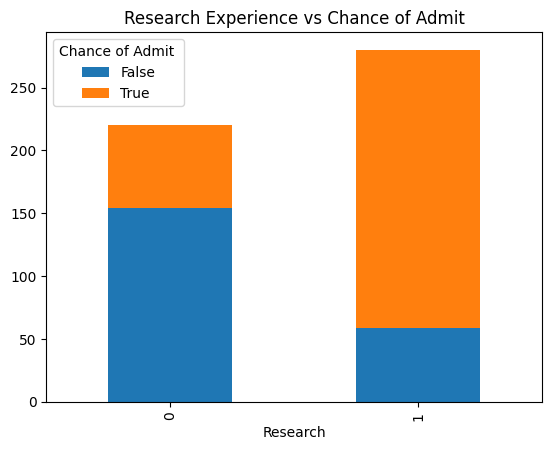

In [23]:
# Stacked Bar Plot for Research vs. Admission Chance
pd.crosstab(df['Research'], df['Chance of Admit '] > 0.7).plot(kind='bar', stacked=True)
plt.title('Research Experience vs Chance of Admit')
plt.show()


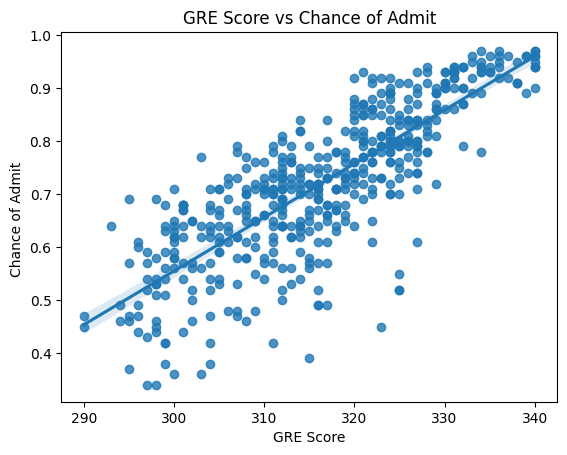

In [24]:
# Scatter plot with regression line
sns.regplot(x=df['GRE Score'], y=df['Chance of Admit '])
plt.title('GRE Score vs Chance of Admit')
plt.show()


# Check the correlation among independent variables and how they interact with each other

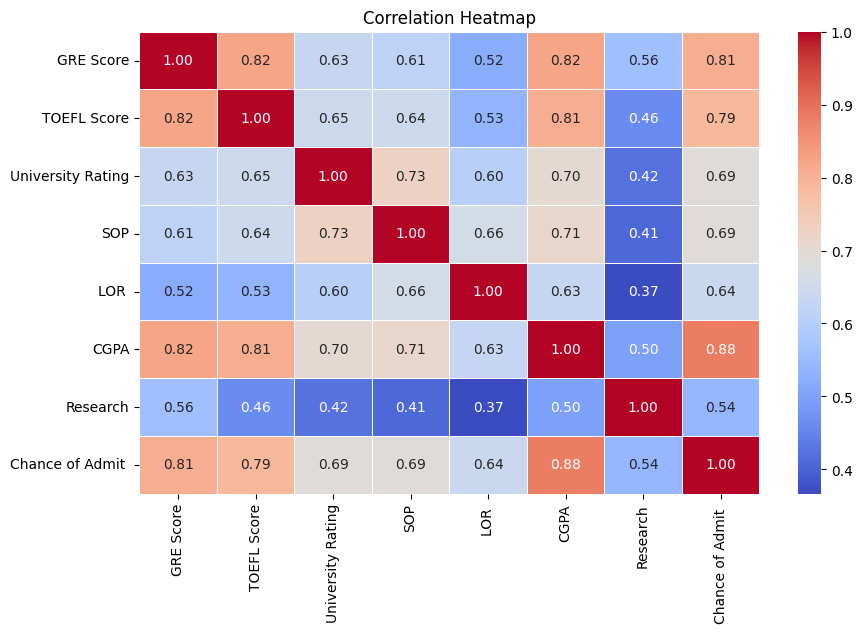

In [25]:
# Compute the correlation matrix
corr_matrix = df_2.corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [26]:
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.824360,0.631514,0.614286,0.518457,0.823739,0.558932,0.807594
TOEFL Score,0.824360,1.000000,0.645349,0.643806,0.533263,0.807282,0.461071,0.788128
University Rating,0.631514,0.645349,1.000000,0.727569,0.603831,0.701979,0.422304,0.688621
SOP,0.614286,0.643806,0.727569,1.000000,0.659858,0.711175,0.406490,0.690654
LOR,0.518457,0.533263,0.603831,0.659858,1.000000,0.631188,0.366721,0.641114
CGPA,0.823739,0.807282,0.701979,0.711175,0.631188,1.000000,0.496515,0.883121
Research,0.558932,0.461071,0.422304,0.406490,0.366721,0.496515,1.000000,0.541346
Chance of Admit,0.807594,0.788128,0.688621,0.690654,0.641114,0.883121,0.541346,1.000000


In [27]:
# Identify features with high correlation (> 0.90)
high_corr_pairs = set()
threshold = 0.90

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:  # Check correlation
            colname = corr_matrix.columns[i]
            high_corr_pairs.add(colname)

print("Features to drop due to high correlation:", high_corr_pairs)

# Drop highly correlated features
df.drop(columns=high_corr_pairs, inplace=True)

# Print updated feature list
print("Remaining features after dropping:", df_2.columns.tolist())

Features to drop due to high correlation: set()
Remaining features after dropping: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [28]:
# highly correlated pairs!
print(high_corr_pairs)

set()


In [29]:
# all the features are imporatant except the serial number!!!
df_2.shape

(497, 8)

# since all the columns are not highly correleated, so we take all the columns from df_2

In [30]:
# df_2 free from outliers and corelations!!!
df_2

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# train_test_split operation!!!

In [31]:
from sklearn.model_selection import train_test_split

y = df_2['Chance of Admit ']
X = df_2.drop(columns='Chance of Admit ', axis=1)

y.shape, X.shape

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((397, 7), (100, 7), (397,), (100,))

# scaling the entire dataset

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
X_train_scaled_df = pd.DataFrame(x_train_scaled, columns=X.columns).reset_index(drop=True)
X_test_scaled_df = pd.DataFrame(x_test_scaled, columns=X.columns).reset_index(drop=True)

In [33]:
X_train_scaled_df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.109369,-0.912490,-0.135635,-1.411440,-0.519819,-1.992742,-1.161513
1,0.070050,0.734888,-0.135635,0.609630,0.017598,0.103614,-1.161513
2,-0.019659,0.405413,-0.135635,0.609630,1.092431,0.829911,0.860946
3,0.877439,1.229102,0.732868,0.104363,0.555015,0.879431,-1.161513
4,-0.109369,0.405413,-0.135635,0.104363,0.555015,-0.077960,-1.161513


In [34]:
X_test_scaled_df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.159760,-0.912490,-0.135635,-0.906172,-1.057235,-0.391588,-1.161513
1,-0.288789,0.075937,0.732868,1.114897,0.555015,0.714364,0.860946
2,-0.468208,-0.088801,-1.004138,-0.906172,0.017598,-0.556656,-1.161513
3,1.056859,1.888053,0.732868,1.114897,1.092431,0.912444,0.860946
4,-0.647628,-0.583014,-0.135635,-1.411440,0.017598,-0.391588,-1.161513


In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train_scaled, y_train)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [0.02237435 0.01830514 0.00238271 0.00501911 0.01654057 0.06817486
 0.01117761]
Model Intercept: 0.7298488664987405


In [36]:
y_pred = model.predict(x_test_scaled)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(y_true, y_pred, dataset_type="Test"):
    """Compute regression metrics and print results"""
    mae = mean_absolute_error(y_true, y_pred)  # Mean Absolute Error
    mse = mean_squared_error(y_true, y_pred)   # Mean Squared Error
    rmse = np.sqrt(mse)                        # Root Mean Squared Error
    r2 = r2_score(y_true, y_pred)              # R-squared (R²) Score

    print(f"📊 {dataset_type} Data Metrics:")
    print(f"➡️  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"➡️  Mean Squared Error (MSE): {mse:.4f}")
    print(f"➡️  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"➡️  R² Score: {r2:.4f}")
    print("-" * 40)

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}


In [38]:
# Predict on training data
y_train_pred = model.predict(x_train_scaled)

# Predict on test data
y_test_pred = model.predict(x_test_scaled)

# Evaluate training data performance
train_metrics = evaluate_model(y_train, y_train_pred, "Training")

# Evaluate test data performance
test_metrics = evaluate_model(y_test, y_test_pred, "Test")


📊 Training Data Metrics:
➡️  Mean Absolute Error (MAE): 0.0415
➡️  Mean Squared Error (MSE): 0.0034
➡️  Root Mean Squared Error (RMSE): 0.0580
➡️  R² Score: 0.8261
----------------------------------------
📊 Test Data Metrics:
➡️  Mean Absolute Error (MAE): 0.0436
➡️  Mean Squared Error (MSE): 0.0037
➡️  Root Mean Squared Error (RMSE): 0.0606
➡️  R² Score: 0.7959
----------------------------------------


# LinearRegression for traning data for GRE score vs chances of admit!!!

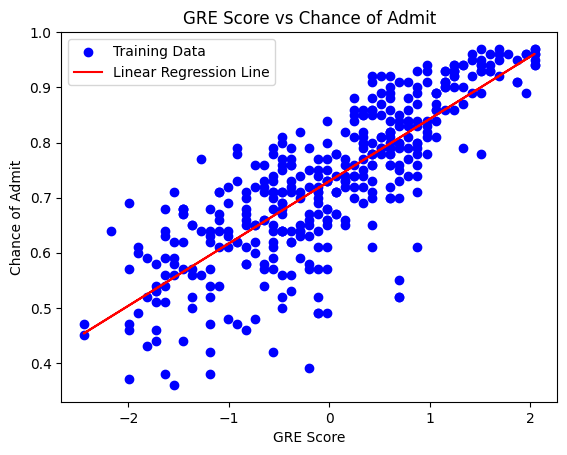

In [39]:
X1 = X[["GRE Score"]]

x1_train_scaled = X_train_scaled_df[["GRE Score"]]

x1_test_scaled = X_test_scaled_df[["GRE Score"]]

model1 = LinearRegression()

model1.fit(x1_train_scaled, y_train)

y1_pred = model1.predict(x1_train_scaled)

fig = plt.figure()
plt.scatter(x1_train_scaled, y_train, color='blue', label='Training Data')
plt.plot(x1_train_scaled, y1_pred, color='red', label='Linear Regression Line')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs Chance of Admit')
plt.legend()
plt.show()

# LinearRegression for test data for GRE score vs chances of admit!!!

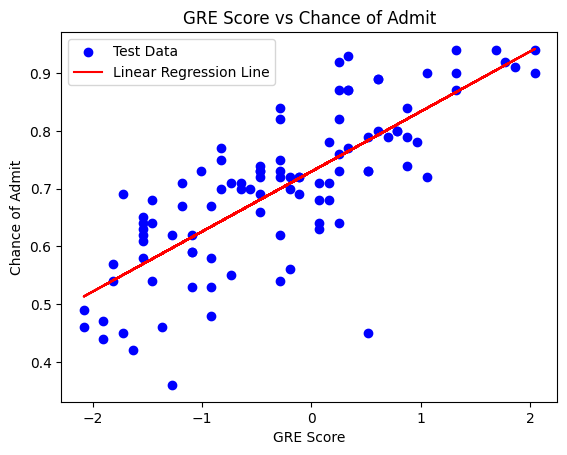

In [40]:
model2 = LinearRegression()

model2.fit(x1_test_scaled, y_test)

y2_pred = model2.predict(x1_test_scaled)

fig = plt.figure()
plt.scatter(x1_test_scaled, y_test, color='blue', label='Test Data')
plt.plot(x1_test_scaled, y2_pred, color='red', label='Linear Regression Line')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs Chance of Admit')
plt.legend()
plt.show()

In [59]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_train_scaled_df)

model3 = sm.OLS(y_train.reset_index(drop=True), X_sm).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.1
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          1.67e-143
Time:                        06:50:01   Log-Likelihood:                 566.95
No. Observations:                 397   AIC:                            -1118.
Df Residuals:                     389   BIC:                            -1086.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7298      0.00

In [60]:
model3.predict(X_sm).head(5)

,0
0,0.545855
1,0.741977
2,0.823839
3,0.830402
4,0.725906


In [61]:
model3.pvalues

,0
const,0.000000e+00
GRE Score,2.991139e-04
TOEFL Score,1.217390e-03
University Rating,6.222685e-01
SOP,3.197192e-01
LOR,1.290282e-04
CGPA,1.868169e-22
Research,2.096830e-03


# Removing high P_value features!!!

In [62]:
# Extract p-values from model summary
p_values = model3.pvalues

# Find features with p-value > 0.05 (Not statistically significant)
high_p_features = p_values[p_values > 0.05].index.tolist()

# Remove 'const' from the list (we always keep the intercept)
if 'const' in high_p_features:
    high_p_features.remove('const')

print("Dropping columns due to high p-values:", high_p_features)


Dropping columns due to high p-values: ['University Rating', 'SOP']


# Removing high p_value feature and creating the new ols model!!!

In [64]:
# Drop high p-value features
X_train_filtered = X_sm.drop(columns=high_p_features)

# Train new OLS model with significant features only
model_refined_4 = sm.OLS(y_train.reset_index(drop=True), X_train_filtered.reset_index(drop=True)).fit()

# Display the refined model summary
print("\nRefined Model Summary:")
print(model_refined_4.summary())



Refined Model Summary:
                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     369.5
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          1.13e-145
Time:                        06:52:27   Log-Likelihood:                 566.01
No. Observations:                 397   AIC:                            -1120.
Df Residuals:                     391   BIC:                            -1096.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7298    

# Assumption of LinearRegression!!!

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X_train_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i) for i in range(X_train_scaled_df.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,CGPA,4.98
0,GRE Score,4.34
1,TOEFL Score,3.65
3,SOP,2.93
2,University Rating,2.70
4,LOR,2.11
6,Research,1.51


# Residual plot

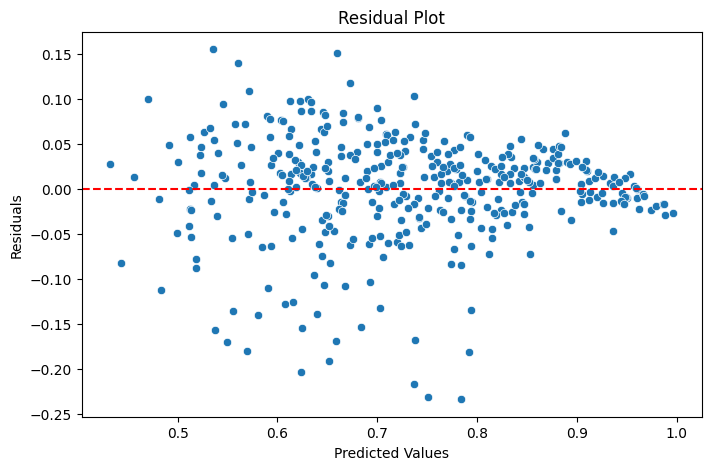

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_train - model3.predict(X_sm)

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=model.predict(X_sm), y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# Homoscedasticity plot

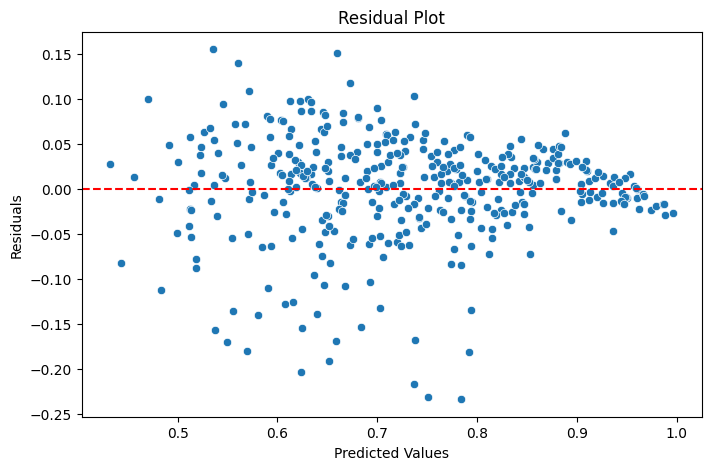

In [85]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=model3.predict(X_sm), y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [86]:
import statsmodels.stats.diagnostic as smd

X_sm = X_sm.reset_index(drop=True)
#y_train = y_train.loc[X_sm.index].reset_index(drop=True)
#y_train = y_train.reset_index(drop=True)
# Perform Goldfeld-Quandt test
gq_test = smd.het_goldfeldquandt(residuals, X_sm)

# Extract p-value
p_value = gq_test[1]

# Print results
print(f"Goldfeld-Quandt Test p-value: {p_value:.5f}")

# Interpretation
if p_value > 0.05:
    print("✅ No strong evidence of heteroscedasticity (Homoscedasticity is validated).")
else:
    print("⚠️ Heteroscedasticity detected! Consider using robust standard errors.")


Goldfeld-Quandt Test p-value: 0.44547
✅ No strong evidence of heteroscedasticity (Homoscedasticity is validated).


# Normality of residuals!!!

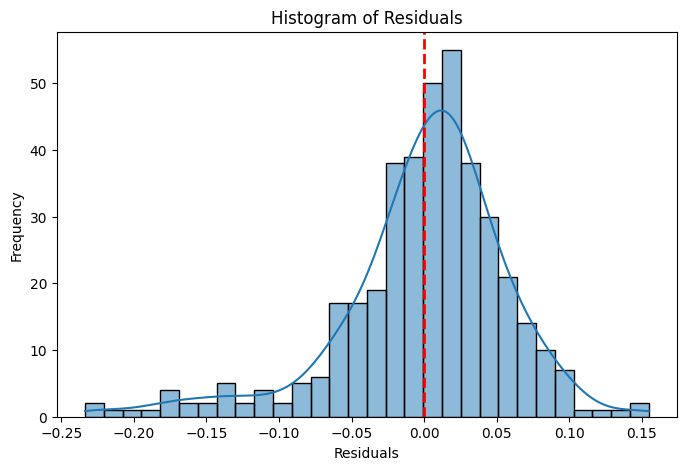

In [91]:
residuals = y_train - model3.predict(X_sm)

# ✅ 1. Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=2)  # Mean line
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# conforming the normality!!!

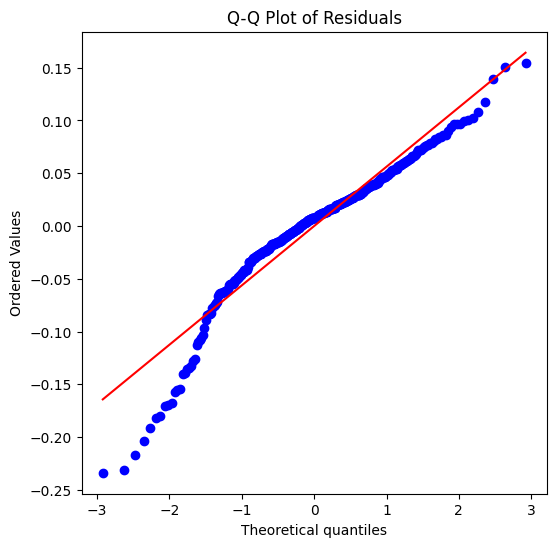

In [92]:
# ✅ 2. Q-Q Plot (Check for Normality)
from scipy import stats
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# evaluation of model performance!!!

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(y_true, y_pred, dataset_type="Test"):
    """Compute regression metrics and print results"""
    mae = mean_absolute_error(y_true, y_pred)  # Mean Absolute Error
    mse = mean_squared_error(y_true, y_pred)   # Mean Squared Error
    rmse = np.sqrt(mse)                        # Root Mean Squared Error
    r2 = r2_score(y_true, y_pred)              # R-squared (R²) Score

    print(f"📊 {dataset_type} Data Metrics:")
    print(f"➡️  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"➡️  Mean Squared Error (MSE): {mse:.4f}")
    print(f"➡️  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"➡️  R² Score: {r2:.4f}")
    print("-" * 40)

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}


In [94]:
y_pred = model3.predict(X_sm)


evaluate_model(y_train, y_pred, "Training")

📊 Training Data Metrics:
➡️  Mean Absolute Error (MAE): 0.0415
➡️  Mean Squared Error (MSE): 0.0034
➡️  Root Mean Squared Error (RMSE): 0.0580
➡️  R² Score: 0.8261
----------------------------------------


{'MAE': 0.04146650828010436,
 'MSE': 0.0033659746924871855,
 'RMSE': np.float64(0.058017020713642176),
 'R²': 0.8261392753723373}

# Insights and recommendations!!!

### **📊 OLS Regression Analysis – Insights & Recommendations**  

Your **Linear Regression Model** summary provides several important metrics that help evaluate the model’s performance. Let’s break it down step by step.

---

## **1️⃣ Model Performance Metrics**
| **Metric**        | **Value** | **Interpretation** |
|------------------|---------|----------------|
| **R-squared** (𝑅²) | **0.826** | ✅ The model explains **82.6% of the variance** in `Chance of Admit`, which is a **strong fit**. |
| **Adjusted R²**   | **0.823** | ✅ Since `Adj. R²` is close to `R²`, it means **adding more variables does not overfit** the model. |
| **F-statistic**   | **264.1** | ✅ A **high F-statistic** with a **very small p-value (1.67e-143)** means the model is **statistically significant** overall. |
| **AIC / BIC**     | **-1118 / -1086** | 🔹 These values are used for model comparison. Lower values are preferred. |

📌 **Conclusion**:  
The model has **good explanatory power** (**82.6% of variance is explained**) and is statistically significant (**low p-value of F-statistic**).

---

## **2️⃣ Coefficients & P-values**
Each coefficient represents how much `Chance of Admit` changes **per unit increase** in the independent variable.

| **Feature**           | **Coefficient** | **p-value** | **Interpretation** |
|---------------------|--------------|------------|----------------|
| **GRE Score**       | **0.0224**    | **0.000**  | ✅ **Significant** – Higher GRE increases admission chances. |
| **TOEFL Score**     | **0.0183**    | **0.001**  | ✅ **Significant** – Higher TOEFL increases admission chances. |
| **University Rating** | **0.0024**  | **0.622**  | ❌ **Not Significant** – University Rating does **not** have a clear impact. |
| **SOP**             | **0.0050**    | **0.320**  | ❌ **Not Significant** – SOP does **not** strongly affect admission chances. |
| **LOR**             | **0.0165**    | **0.000**  | ✅ **Significant** – Strong LOR increases admission chances. |
| **CGPA**            | **0.0682**    | **0.000**  | ✅ **Very Significant** – **Most important feature** (highest coefficient). |
| **Research**        | **0.0112**    | **0.002**  | ✅ **Significant** – Having research experience increases admission chances. |

📌 **Key Takeaways:**  
✅ **GRE, TOEFL, LOR, CGPA, and Research are significant factors** in predicting admission chances.  
❌ **University Rating and SOP are NOT statistically significant (p > 0.05)**.  

**👉 Recommendation:** **Drop "University Rating" and "SOP" from the model** and retrain.

---

## **3️⃣ Residual Analysis (Model Assumptions)**
### **🔹 Normality of Residuals**
| **Test**               | **Value** | **Interpretation** |
|-----------------------|---------|----------------|
| **Omnibus Test**       | **84.887 (p < 0.05)** | ❌ Residuals are **not normally distributed**. |
| **Jarque-Bera (JB)**   | **186.411 (p < 0.05)** | ❌ Residuals have **skewness (-1.099) and high kurtosis (5.538)**. |

**📌 What This Means:**  
- The residuals **do not follow a perfect normal distribution**, which slightly violates regression assumptions.
- The model may perform better with **log transformation** or using a **robust regression approach**.

---

### **🔹 Multicollinearity Check**
| **Metric**         | **Value** | **Interpretation** |
|-------------------|---------|----------------|
| **Condition Number** | **5.74** | ✅ **No serious multicollinearity** (should be < 30). |

**📌 Conclusion:**  
There is **no strong multicollinearity**, meaning independent variables are not highly correlated.

---

### **🔹 Homoscedasticity Check**
| **Metric** | **Interpretation** |
|-----------|----------------|
| **Durbin-Watson (2.053)** | ✅ No autocorrelation issue (should be between **1.5 - 2.5**). |

✔ **The errors are randomly distributed**, so the assumption of **constant variance (homoscedasticity) is satisfied**.

---

## **🔎 Final Recommendations**
### ✅ **Keep These Variables (Significant Factors)**
- **GRE Score**
- **TOEFL Score**
- **LOR**
- **CGPA** (**Most Important Variable**)  
- **Research Experience**

### ❌ **Drop These Variables (Not Significant)**
- **University Rating** (p = 0.622)  
- **SOP** (p = 0.320)  
